### Linear Regression Multiple Variables

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('homeprices_1.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [4]:
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


#### Correlation

In [5]:
df.corr()

,area,bedrooms,age,price
area,1.000000,0.753288,-0.445300,0.901476
bedrooms,0.753288,1.000000,-0.876614,0.923789
age,-0.445300,-0.876614,1.000000,-0.734167
price,0.901476,0.923789,-0.734167,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

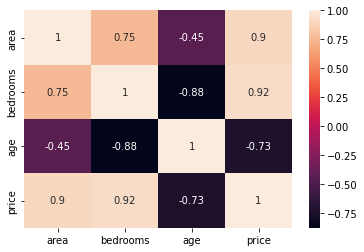

In [7]:
sns.heatmap(df.corr(),annot=True)

#### Data Preprocessing: Fill NA values with median value of a column

In [8]:
df.bedrooms.mean()

4.2

In [9]:
median = df.bedrooms.median()
median

4.0

(array([2., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 10 artists>)

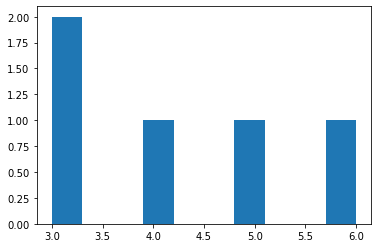

In [10]:
import matplotlib.pyplot as plt
plt.hist(df.bedrooms)

In [11]:
df.bedrooms = df.bedrooms.fillna(median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [13]:
X = df[['area', 'bedrooms', 'age']]

In [14]:
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [15]:
y = df.price
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [17]:
reg.score(X,y)

0.9550196399325819

In [18]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [19]:
reg.intercept_

221323.00186540384

#### Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [20]:
reg.predict([[3000, 3, 40]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [21]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

#### Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [22]:
reg.predict([[2500, 4, 5]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])